culdesacNum 4
interior_parcels 84
[4.08705, 0.21562, 4.02137, 0.21869, 4.09517, 0.27007, 4.08705, 0.21562, 4.08705, 0.21562, 4.16319, 0.21183, 4.08255, 0.18007, 4.08705, 0.21562, 3.96907, 0.2032, 4.02137, 0.21869, 4.02299, 0.27345, 4.02137, 0.21869, 4.05728, 0.48931, 4.05936, 0.53377, 4.11809, 0.49236, 4.05728, 0.48931, 4.05728, 0.48931, 3.94415, 0.49119, 4.05454, 0.43074, 4.05728, 0.48931, 4.05936, 0.53377, 4.06658, 0.56595, 4.05936, 0.53377, 3.94752, 0.53913, 4.33023, 0.52771, 4.32623, 0.4727, 4.33023, 0.52771, 4.33112, 0.56815, 4.33023, 0.52771, 4.37337, 0.52579, 4.32623, 0.4727, 4.25546, 0.48184, 4.32623, 0.4727, 4.42151, 0.46422, 4.32623, 0.4727, 4.3209, 0.41119, 3.89428, 0.34446, 3.80425, 0.35421, 3.89428, 0.34446, 3.94295, 0.33919, 3.88921, 0.29761, 3.89428, 0.34446, 3.80425, 0.35421, 3.79918, 0.30736, 3.80891, 0.39719, 3.80425, 0.35421, 3.96907, 0.2032, 3.92673, 0.18664, 3.94548, 0.27838, 3.96907, 0.2032, 3.96907, 0.2032, 3.97673, 0.16873, 3.92673, 0.18664, 3.90999, 0.18009, 3.

[]

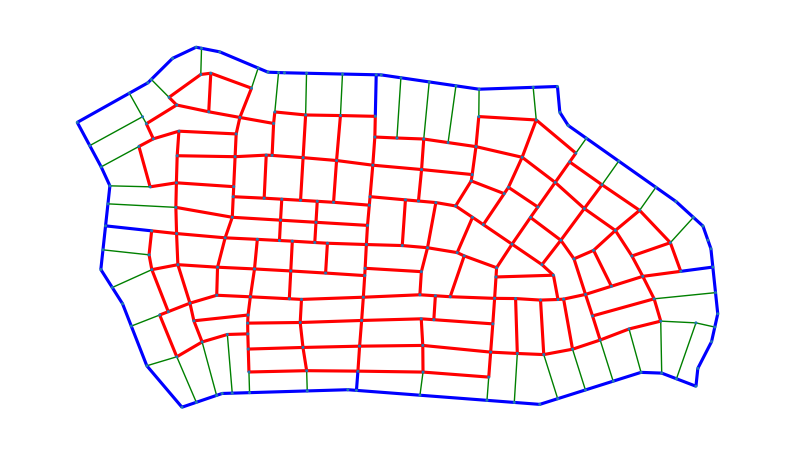

In [1]:
######################################################################
############################## Add Path ##############################
######################################################################
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 
parent_dir = os.path.dirname(cwd)
sys.path.append(parent_dir) 

import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import time

import pickle

import DebugAndPreview as DP


######################################################################
############################## Add Path ##############################
######################################################################
cwd = os.getcwd()
sys.path.append(cwd) 
parent_dir = os.path.dirname(cwd)
sys.path.append(parent_dir) 

#######################################################################
###############   Input the name of site   ############################
#######################################################################
# siteName = "Harare"
# siteName = "CapeTown1"
# siteName = "CapeTown2"
# siteName = "India"

siteName = "Toa_Payoh_1"

#######################################################################
############################## Load File ##############################
#######################################################################
jsonName = siteName + ".json"                             
jsonPath = parent_dir + "/JSONInput/" + jsonName
# jsonPath = parent_dir + "/JSONInput/OriginalPaper/" + jsonName      # for original
myG,myNodeDict,myEdgeDict = mgh.GraphFromJSON_Customized(jsonPath,scaleTag=True,new_min = 0,new_max = 5)   #  min and max is the range of the scale


#######################################################################
####################### Build the graph ###############################
#######################################################################

###### Initialize info ######
initialCandidateRoadEdges = len(myG.myedges()) - len(myG.road_edges)
# print ("initial candidate road edges", initialCandidateRoadEdges)

myG.define_roads_FirstTime()                 # Road
myG.define_interior_parcels()                # Interior_Parcels


remainCandidateRoadEdges = len(myG.myedges()) - len(myG.road_edges)
# print ("remain candidate road edges", remainCandidateRoadEdges)


######  Feature and property ######
myG.feature_init()
#myG.td_dict_POI_Related_init()

#####  Manuallu assign edge as road ######
myG.originalRoadEdges = [e for e in myG.edge_list if e.isRoad]

myG.CheckCuldesacNum()
# print ("before assign")
# print ("culdesacNum",myG.culdesacNum)
# print ("interior_parcels",len(myG.interior_parcels))
# print ("--------------")
# ##### Add road######

# siteName = "Harare_Center"    # edge 23
# indices = [23]

# siteName = "CapeTown1_Center"    # edge 44
# indices = [44]

# siteName = "CapeTown2_Center"    # edge 67
# indices = [67]

# siteName = "India_Center"    # edge 82
# indices = [82]

# siteName = "tengah_3"    # edge 
# indices = []

# siteName = "Toa_Payoh_1_CenterD"    # edge 
# indices = [106]



siteName = "Toa_Payoh_1_MultiAccessA"    # edge 
indices = [90,334,223,18]


for index in range(len(myG.edge_list)):
    e = myG.edge_list[index]
    if index in indices:
        myG.add_road_segment(e)
myG.CheckCuldesacNum()
# removeInnerFace_list = []
# for face in myG.inner_facelist_True:
#     for edge in face.edges:
#         index = myG.edge_list.index(edge)
#         if index in indices:
#             removeInnerFace_list.append(face)

# for face in removeInnerFace_list:
#     myG.inner_facelist_True.remove(face)
#     myG.interior_parcels.remove(face)

# print ("after assign")
print ("culdesacNum",myG.culdesacNum)
print ("interior_parcels",len(myG.interior_parcels))



# myG.culdesacNum = len(indices)
# myG.culdesacNum = 2
#######################################################################
####### Save this original state to mg before the road building #######
#######################################################################
save_dir = parent_dir + "/data"
DP.SaveGraph_mg(myG,save_dir,siteName)


# #######################################################################
# ########################### Road building  ############################
# #######################################################################
# new_roads_i = mgh.build_all_roads(myG,
#                                 myG, # ??
#                                 alpha=2,
#                                 wholepath=True,
#                                 barriers=False,
#                                 road_max=1,
#                                 plot_intermediate=False,
#                                 strict_greedy=True,
#                                 vquiet=False,
#                                 outsidein=True
#                                 )

###### Preview the graph ######
# myG.plot_roads(parcel_labels=True)
# plt.plot()

# ###### Feature recalculate ######
# myG.td_dict_POI_Related_init()
# remainCandidateRoadEdges = len(myG.myedges()) - len(myG.road_edges)
# # print ("remain candidate road edges", remainCandidateRoadEdges)


DP.PrintEdgeCoords(myG.edge_list)


# indices = [243,116,117,240,162,33,32,111,110,113,114]


# for index in range(len(myG.edge_list)):
#     e = myG.edge_list[index]
#     if index in indices:
#         myG.add_road_segment(e)

###### Preview the graph ######
myG.plot_roads(parcel_labels=True)
plt.plot()







[Face with centroid at (1.97,1.52), Face with centroid at (2.85,2.16), Face with centroid at (2.97,1.89), Face with centroid at (3.29,1.75), Face with centroid at (2.94,1.23), Face with centroid at (3.51,1.81), Face with centroid at (2.94,2.24), Face with centroid at (2.94,2.06), Face with centroid at (2.29,1.60), Face with centroid at (2.76,1.44), Face with centroid at (3.04,1.94), Face with centroid at (3.63,1.96), Face with centroid at (3.12,2.02), Face with centroid at (3.38,1.66), Face with centroid at (2.37,1.76), Face with centroid at (2.99,1.60), Face with centroid at (2.19,1.57), Face with centroid at (2.20,1.44), Face with centroid at (3.11,2.23), Face with centroid at (2.74,1.73), Face with centroid at (3.20,2.15), Face with centroid at (3.02,2.13), Face with centroid at (3.03,2.33), Face with centroid at (3.50,2.03), Face with centroid at (3.17,1.36), Face with centroid at (3.27,1.52), Face with centroid at (2.29,1.43), Face with centroid at (2.92,1.37), Face with centroid 

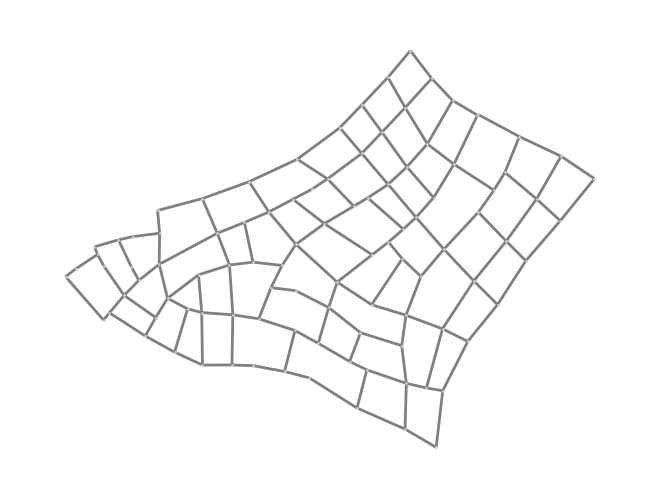

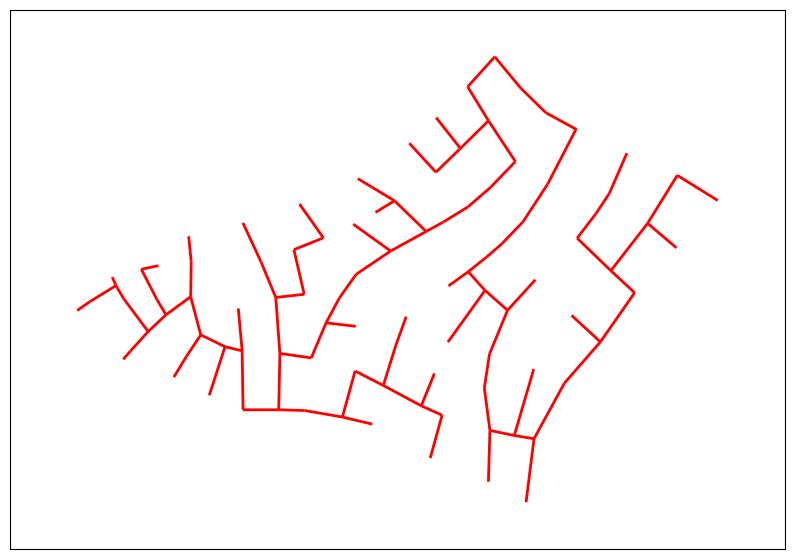

In [37]:
import math

def calculate_distance(point1, point2):
   
    distance = math.sqrt((point1.x - point2.x)**2 + (point1.y - point1.y)**2)
    return distance

# 示例使用



import networkx as nx

G = nx.Graph()

print (myG.interior_parcels)

internalEdges = []
internalNodes = []
for face in myG.interior_parcels:
    for edge in face.ordered_edges:
        if edge not in internalEdges:
            internalEdges.append(edge)

print ("internalEdges",internalEdges)
print ("internalNodes",internalNodes)


for edge in internalEdges:
    G.add_edge(edge.nodes[0], edge.nodes[1], weight=calculate_distance(edge.nodes[0],edge.nodes[1]))
    if edge.nodes[0] not in internalNodes:
        internalNodes.append(edge.nodes[0])
    if edge.nodes[1] not in internalNodes:
        internalNodes.append(edge.nodes[1])

node_positions = {}

for i in range(len(internalNodes)):
    node_positions[internalNodes[i]] = (internalNodes[i].x, internalNodes[i].y)

# 计算最小生成树
mst = nx.minimum_spanning_tree(G)

# 获取节点的2D位置 (spring_layout 会将图形强制在2D平面上布局)
nx.draw(G, pos=node_positions, with_labels=False, node_color='lightblue', node_size=1, edge_color='gray', width=2)

# 绘制原始图（带权重）
plt.figure(figsize=(10, 7))


# 绘制最小生成树上的边
nx.draw_networkx_edges(mst, node_positions, edge_color='red', width=2)

# # 显示图形
# plt.title("Minimum Spanning Tree")
# plt.show()


In [1]:
#######################################################################
########################### Road A File ###############################
#######################################################################
file_path = '/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput/tempFile.mg'
# Read the data
with open(file_path, 'rb') as mgfile:
    myG = pickle.load(mgfile)

In [16]:
####################################
#######   Get Road balances   ######
####################################
total_road_steps = len(myG.myedges()) - len(myG.road_edges)    # Check the current road configuration!
build_ration = 0.5
allowed_road_steps  = build_ration * total_road_steps - len(myG.road_edges)
print ("allowed_road_steps",allowed_road_steps)


####################################
######   Check current values ######
####################################
print (myG.face2POI_avg())
print (myG.f2POI_avg)
print (myG.f2POI_avg_min)




allowed_road_steps -164.5
1.4216780249781595
1.4216780249781595
1.0529360924060305



In [2]:
############### This is to visualze the “parcel to parcel distance”（F2F） improvement after adding new roads  ############### 

####################################
############    F2F     ############
####################################
# PlotF2FDist(S0,vmin = 0,vmax = 5000)
# optNum = 5
# for i in range(optNum):  
#     bisecting_roads = mgh.bisecting_road(S0)
#     S0.plot_roads(parcel_labels=True)
#     S0.PlotF2FDist(vmin = 0,vmax = 5000)



209
td_init
212


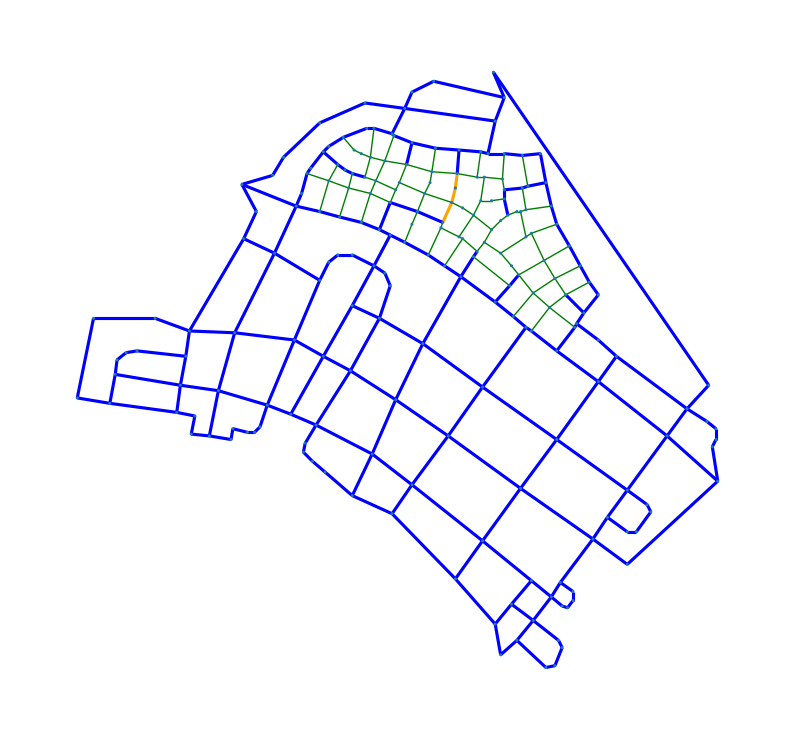

td_init
216


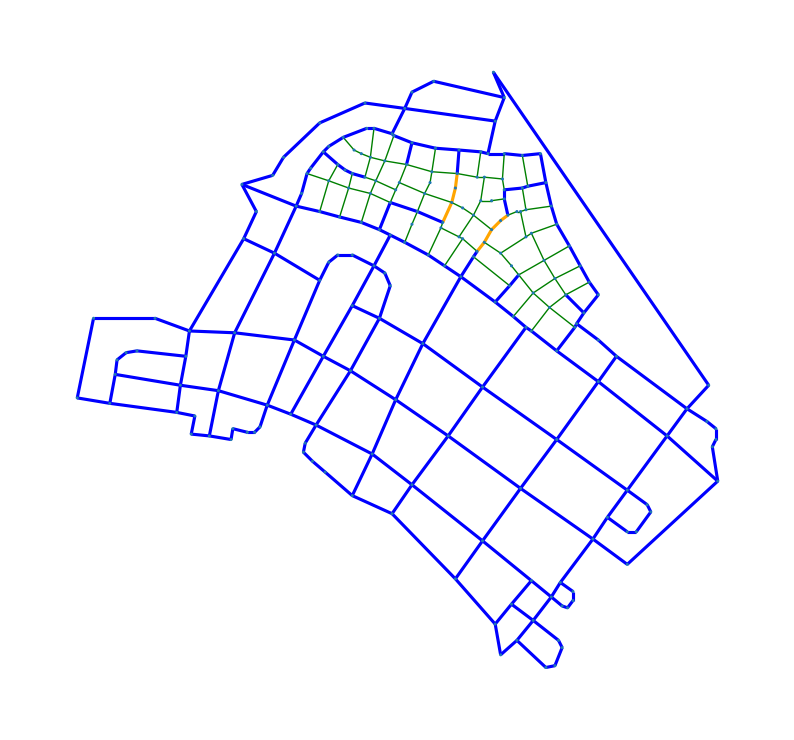

td_init
230


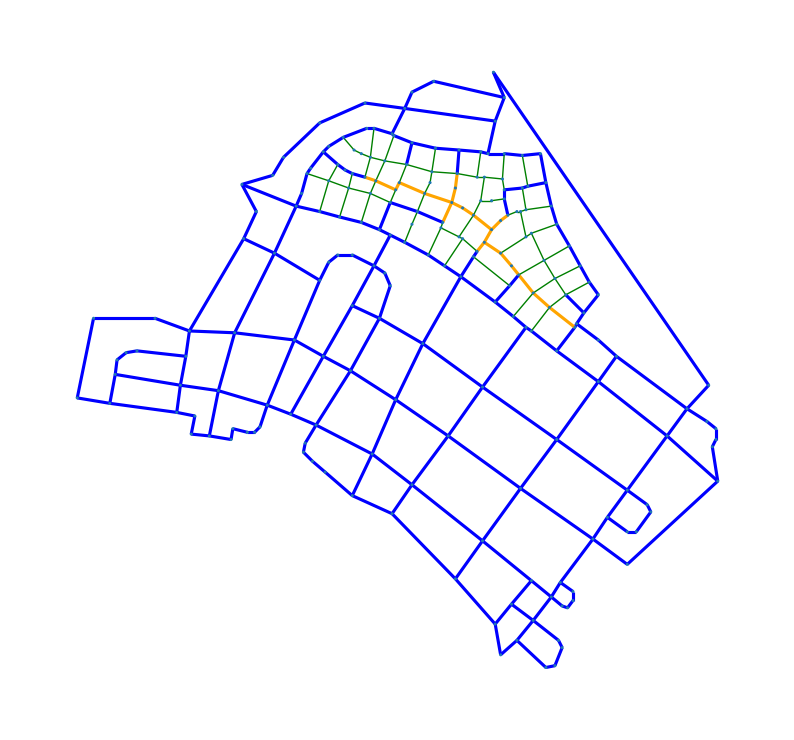

td_init
232


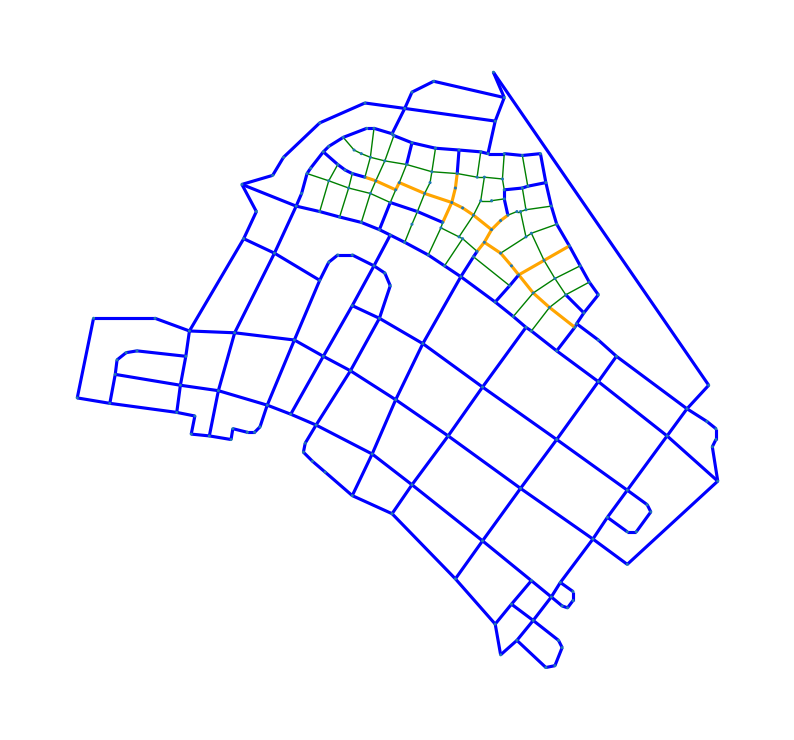

td_init
234


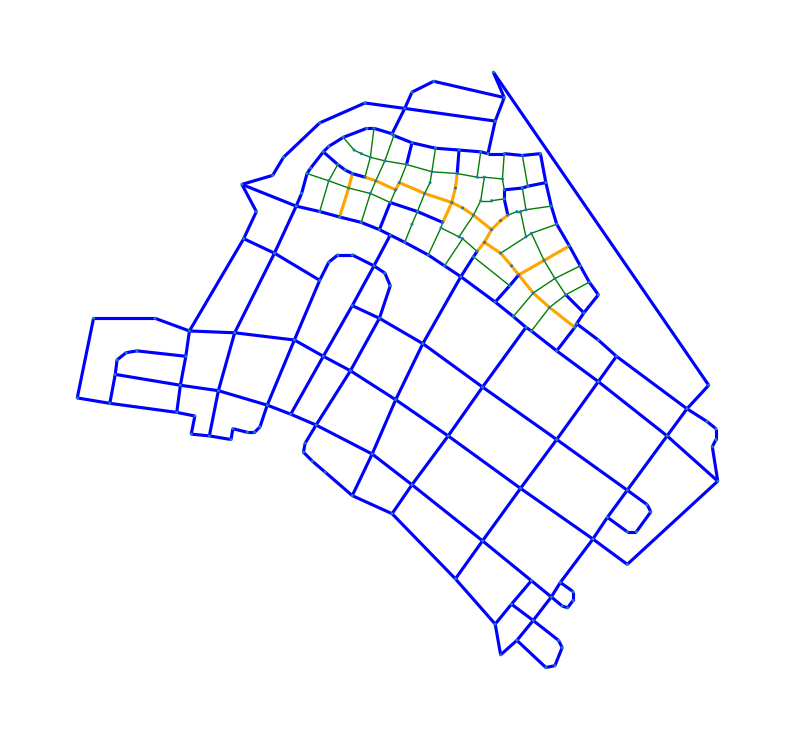

td_init
236


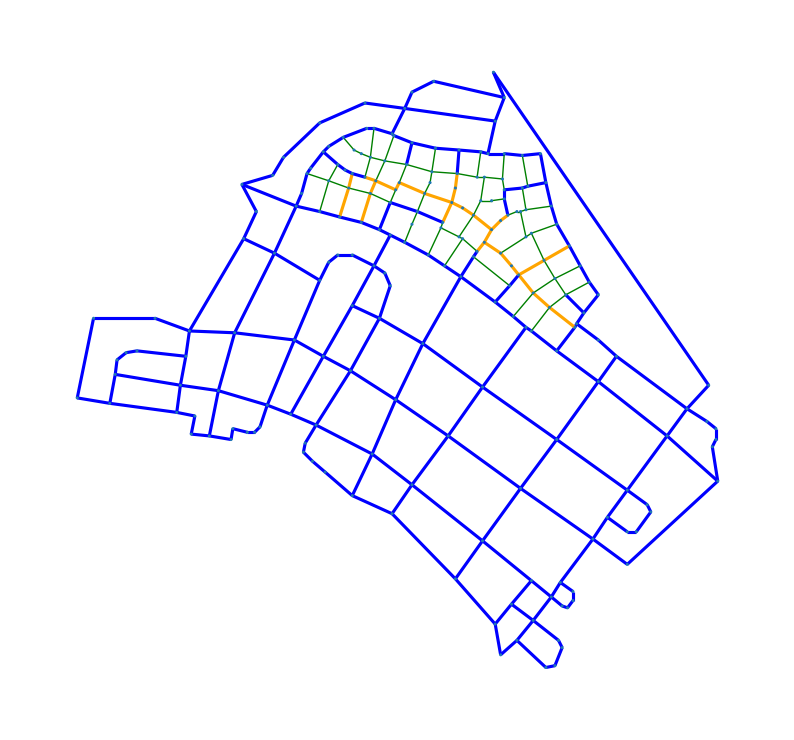

In [18]:
############### This is to visualze the “parcel to POI distance”（F2POI）improvment after adding new roads  ############### 
############### Provide 2 kinds of loop: 1. Loop by iteration 2. Loop by road ration  ###############

##############################
###### F2POI: POI       ######
##############################
S0 = copy.deepcopy(myG)

################ Loop by iteration ################

# optNum = 1
# time1 = time.time()
# S0.td_dict_POI_Related_init() 
# #S0.PlotF2POIDist()
# time1 = time.time()
# for i in range(optNum): 
#     mgh.bisecting_road_forPOI(S0)
#     S0.td_dict_POI_Related_init() 
#     print (len(S0.road_edges))
#     #S0.plot_roads(parcel_labels=True)
#     #S0.PlotF2POIDist()
# time2= time.time()

# print ("comsumption",time2-time1)
# time1 = time.time()
# S0.td_dict_init()
# time2 = time.time()
# print ("comsumption",time2-time1)

################  Loop by road ration ################

i= 0
while i < 6:
    S0.td_dict_POI_Related_init() 
    mgh.bisecting_road_forPOI(S0)
    print (len(S0.road_edges))
    S0.plot_roads(parcel_labels=True)
    #S0.PlotF2POIDist()

    plt.show()
    i+=1